In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
odi_batting=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\odi_batting_cleaned.csv')
odi_bowling=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\odi_bowling_cleaned.csv')
odi_fielding=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\Cleaned dataset\\odi_fieldling_cleaned.csv')

In [46]:
odi_batting.head()
odi_bowling.head()
#odi_fielding

,Mat,Inns,Balls,Runs,Wkts,Ave,Econ,SR,4,5,Startyear,Endyear,BBIwick,BBIruns,Name,Country
0,350,341.0,18811.0,12326.0,534.0,23.08,3.93,35.2,15.0,10.0,1993,2011,7,30,M Muralitharan,Asia/ICC/SL
1,356,351.0,18186.0,11812.0,502.0,23.52,3.89,36.2,17.0,6.0,1984,2003,5,15,Wasim Akram,PAK
2,262,258.0,12698.0,9919.0,416.0,23.84,4.68,30.5,14.0,13.0,1989,2003,7,36,Waqar Younis,PAK
3,322,320.0,15775.0,11014.0,400.0,27.53,4.18,39.4,9.0,4.0,1994,2008,8,19,WPUJC Vaas,Asia/SL
4,398,372.0,17670.0,13632.0,395.0,34.51,4.62,44.7,4.0,9.0,1996,2015,7,12,Shahid Afridi,Asia/ICC/PAK


In [3]:
common_columns = ['Startyear', 'Endyear', 'Country']  # Example of shared columns
odi_batting.rename(columns=lambda x: x.lower().strip(), inplace=True)
odi_bowling.rename(columns=lambda x: x.lower().strip(), inplace=True)
odi_fielding.rename(columns=lambda x: x.lower().strip(), inplace=True)
for col in common_columns:
    if col in odi_bowling and col in odi_batting:
        odi_bowling.drop(columns=col, inplace=True) 
combined_data_odi = pd.merge(odi_batting, odi_bowling, on='name', how='outer', suffixes=('_batting', '_bowling'))
combined_data_odi = pd.merge(combined_data_odi, odi_fielding, on='name', how='outer', suffixes=('', '_fielding'))
combined_data_odi = combined_data_odi.loc[:, ~combined_data_odi.columns.duplicated()]
combined_data_odi.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 2597
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mat_batting        2517 non-null   float64
 1   inns_batting       2517 non-null   float64
 2   no                 2517 non-null   float64
 3   runs_batting       2517 non-null   float64
 4   hs                 2517 non-null   float64
 5   ave_batting        2517 non-null   float64
 6   bf                 2517 non-null   float64
 7   sr_batting         2517 non-null   float64
 8   100                2517 non-null   float64
 9   50                 2517 non-null   float64
 10  0                  2517 non-null   float64
 11  startyear_batting  2517 non-null   float64
 12  endyear_batting    2517 non-null   float64
 13  hsnotout           2517 non-null   object 
 14  name               2598 non-null   object 
 15  country_batting    2517 non-null   object 
 16  mat_bowling        2598 

In [7]:
combined_data_odi.isna().sum()

mat_batting            81
inns_batting           81
no                     81
runs_batting           81
hs                     81
ave_batting            81
bf                     81
sr_batting             81
100                    81
50                     81
0                      81
startyear_batting      81
endyear_batting        81
hsnotout               81
name                    0
country_batting        81
mat_bowling             0
inns_bowling            0
balls                   0
runs_bowling            0
wkts                    0
ave_bowling             0
econ                    0
sr_bowling              0
4                       0
5                       0
startyear_bowling       0
endyear_bowling         0
bbiwick                 0
bbiruns                 0
country_bowling         0
mat                  2548
inns                 2548
dis                  2548
ct                   2548
st                   2548
ct wk                2548
ct fi                2548
md          

In [17]:
combined_data_odi.to_csv(r"D:\Studies\Bangalore\Python\datasets for project\combined_data_odi.csv",index=False)

In [63]:
combined_data.head()


,Mat_batting,Inns_batting,NO,Runs_batting,HS,Ave_batting,BF,SR_batting,100,50,...,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,Country,Startyear,Endyear
0,463.0,452.0,41.0,18426.0,200.0,44.83,21367.0,86.23,49.0,96.0,...,140.0,140.0,0.0,0.0,140.0,4 (4ct 0st),0.307,INDIA,1989.0,2012.0
1,404.0,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,...,501.0,402.0,99.0,383.0,19.0,5 (4ct 1st),1.261,Asia/ICC/SL,2000.0,2015.0
2,375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,...,160.0,160.0,0.0,0.0,160.0,3 (3ct 0st),0.430,AUS/ICC,1995.0,2012.0
3,445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,...,123.0,123.0,0.0,0.0,123.0,3 (3ct 0st),0.278,Asia/SL,1989.0,2011.0
4,448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,...,218.0,218.0,0.0,0.0,218.0,4 (4ct 0st),0.492,Asia/SL,1998.0,2015.0


In [74]:
#filter allrounders with  atleast 3000 runs scored and 100 wickets taken
data_allrounders=combined_data_odi[(combined_data_odi['wkts']>100)&(combined_data_odi['runs_batting']>3000)]

In [76]:
data_allrounders['name']

0         sr tendulkar
3        st jayasuriya
7            jh kallis
11            ch gayle
13          tm dilshan
18         pa de silva
22        yuvraj singh
30       shahid afridi
33            sr waugh
34        shoaib malik
47        iva richards
49     mohammad hafeez
50           gw flower
53     shakib al hasan
65          ad mathews
67           cl hooper
68           sr watson
72           wj cronje
85      pd collingwood
86           a symonds
87        abdul razzaq
89           cl cairns
97           sb styris
100          cz harris
102       e chigumbura
119        n kapil dev
120        wasim akram
126         imran khan
130         l klusener
131         sm pollock
134         kj o'brien
138         a flintoff
152         rj shastri
Name: name, dtype: object

In [78]:
kallis=data_allrounders[data_allrounders['name']=='jh kallis']
kallis.info()

In [120]:
plus50=kallis['50'].sum()+kallis['100'].sum()
plus50
less50=kallis['inns_batting'].sum()-plus50
less50
data_50above=[plus50,less50]

Text(0.5, 0.98, 'Jacques Kallis-Statistics')

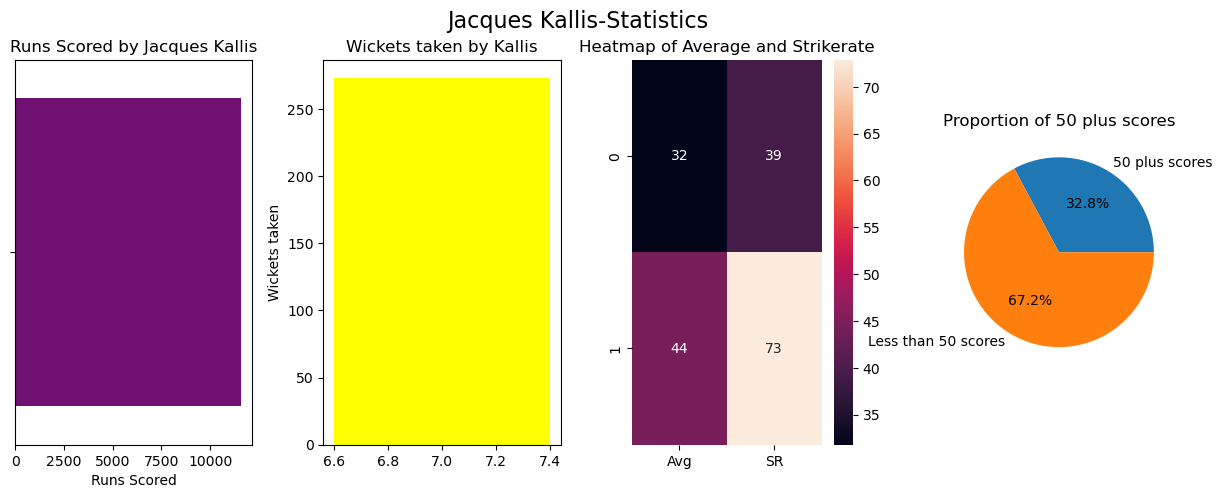

In [123]:
#Visual Stats of Jacques Kallis
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.3)  
plt.subplot(1,4,1)
sns.barplot(data=kallis,x='runs_batting',color='purple')
plt.xlabel('Runs Scored')
plt.title("Runs Scored by Jacques Kallis")
plt.subplot(1,4,2)
plt.bar(kallis.index,kallis['wkts'],color='yellow')
plt.ylabel("Wickets taken")
plt.title("Wickets taken by Kallis")
plt.subplot(1,4,3)
sns.heatmap(avg_matrix1,annot=True)
plt.title("Heatmap of Average and Strikerate")
plt.subplot(1,4,4)
plt.pie(data_50above,labels=["50 plus scores","Less than 50 scores"],autopct='%1.1f%%')
plt.title('Proportion of 50 plus scores')
plt.suptitle('Jacques Kallis-Statistics', fontsize=16)


In [102]:
avg_matrix={'Avg':[kallis['ave_bowling'].sum(),kallis['ave_batting'].sum()],'SR':[kallis['sr_bowling'].sum(),kallis['sr_batting'].sum()]}

In [105]:
avg_matrix1

,Avg,SR
0,31.79,39.30
1,44.36,72.89


In [3]:
combined_odi=pd.read_csv('D:\\Studies\\Bangalore\\Python\\datasets for project\\combined_data_odi.csv')

In [10]:
combined_odi['name'].head()

0        sr tendulkar
1       kc sangakkara
2          rt ponting
3       st jayasuriya
4    dpmd jayawardene
Name: name, dtype: object

In [58]:
#Function to show basic stats of a specific player
def playerstat(playername):
    playerdata=combined_odi[combined_odi['name']==playername.lower()]
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(wspace=0.6)  
    plt.subplot(1,5,1)
    sns.barplot(data=playerdata,x='runs_batting',color='purple')
    plt.xlabel('Runs Scored')
    plt.title("Runs Scored")
    plt.subplot(1,5,2)
    plt.bar(playerdata.index,playerdata['wkts'],color='yellow')
    plt.ylabel("Wickets taken")
    plt.title("Wickets taken")
    plt.subplot(1,5,3)
    avg_matrix1=pd.DataFrame({'Avg':[playerdata['ave_bowling'].sum(),playerdata['ave_batting'].sum()],'SR':[playerdata['sr_bowling'].sum(),playerdata['sr_batting'].sum()]})
    sns.heatmap(avg_matrix1,annot=True,fmt=".2f",linewidth=2,cmap="coolwarm")
    plt.title("Heatmap of Average and Strikerate")
    plt.subplot(1,5,4)
    plus50=playerdata['50'].sum()+playerdata['100'].sum()
    less50=playerdata['inns_batting'].sum()-plus50
    data_50above=[plus50,less50]
    plt.pie(data_50above,labels=["50 plus scores","Less than 50 scores"],autopct='%1.1f%%')
    plt.title('Proportion of 50 plus scores')
    try:
        plt.subplot(1,5,5)
        plt.bar(playerdata.index,playerdata['ct'],color='blue')
        plt.ylabel("Catches Taken")
        plt.title('Catches Taken')
    except:
        pass
    plt.suptitle('Statistics ODI', fontsize=16)
    

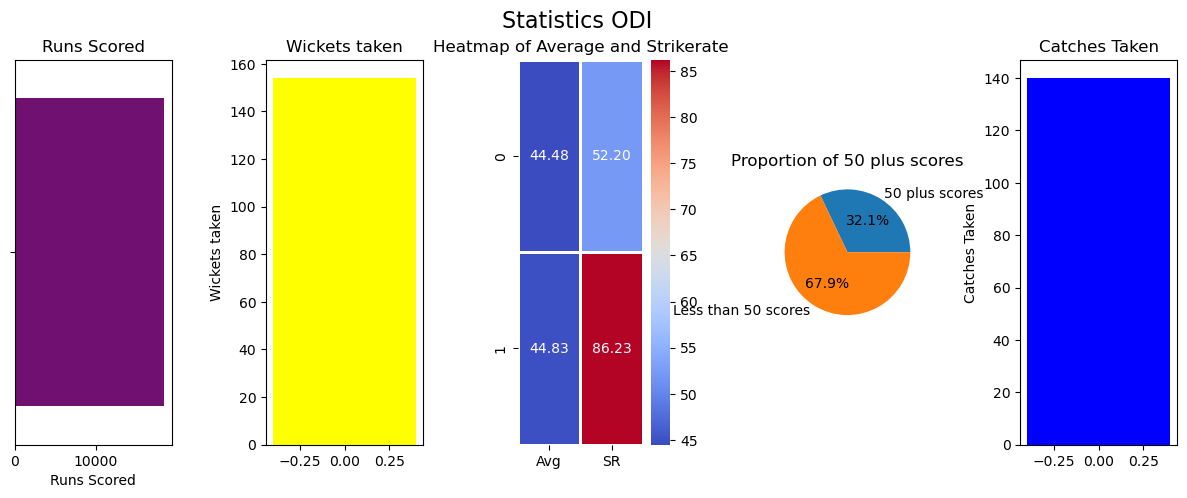

In [56]:
playerstat('sr tendulkar')

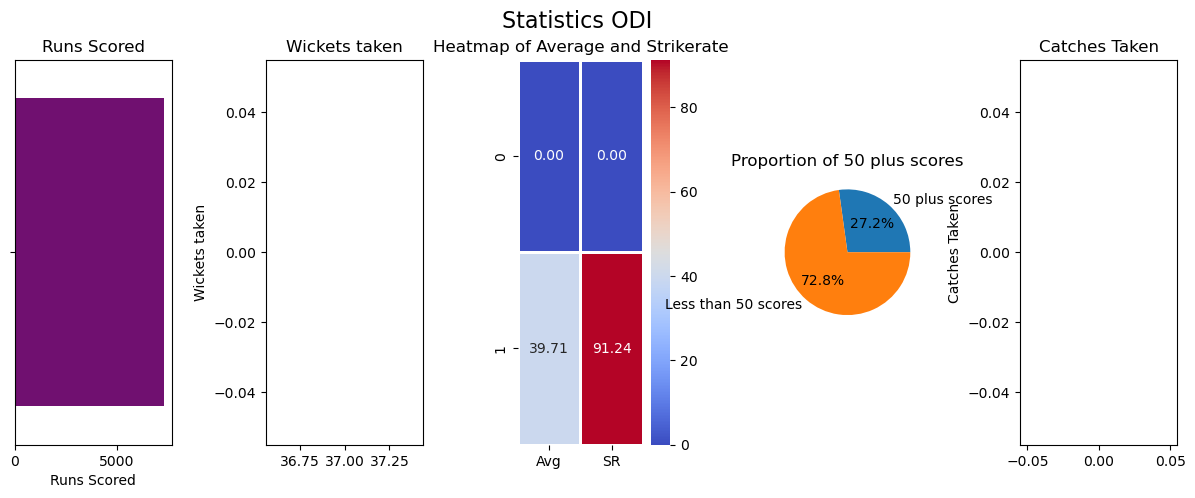

In [59]:
playerstat('ejg morgan')

In [64]:
combined_odi['careerspan']=combined_odi['endyear_bowling']-combined_odi['startyear_bowling']

In [65]:
combined_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mat_batting        2517 non-null   float64
 1   inns_batting       2517 non-null   float64
 2   no                 2517 non-null   float64
 3   runs_batting       2517 non-null   float64
 4   hs                 2517 non-null   float64
 5   ave_batting        2517 non-null   float64
 6   bf                 2517 non-null   float64
 7   sr_batting         2517 non-null   float64
 8   100                2517 non-null   float64
 9   50                 2517 non-null   float64
 10  0                  2517 non-null   float64
 11  startyear_batting  2517 non-null   float64
 12  endyear_batting    2517 non-null   float64
 13  hsnotout           2517 non-null   object 
 14  name               2598 non-null   object 
 15  country_batting    2517 non-null   object 
 16  mat_bowling        2598 